In [2]:
#QUESTION 1

#SAME PROGRAM USING PANDAS LIBRARY
#import pandas as pd
#df = pd.read_csv('Starfish_Data.csv')
#def dist(vmag,logl):
#    return 10**((vmag+2.5*logl+0.17)/5)
#df.insert(3,'Distance',dist(df['Vmag'],df['logL']))
#import numpy as np
#avgdistance = np.average(df['Distance'],weights=df['Prob'])
#print(avgdistance)

import numpy as np
vmag,logl,prob=np.loadtxt(f'Starfish_Data.csv',delimiter=',',unpack=True)
distances = 10**((vmag+2.5*logl+0.17)/5)
print(np.average(distances,weights=prob))

1380.9685750179326


Number of HMXB is 118
Number of LMXB is 121
Coordinates of Granat 1915+105: 288.820833 RA, 10.968333 Dec 


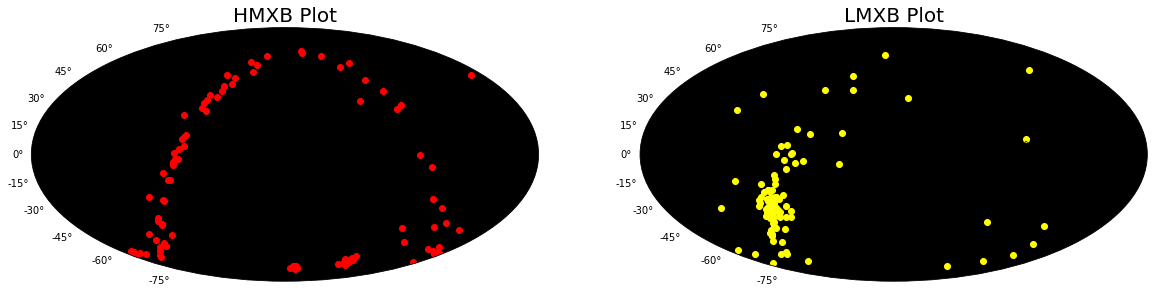

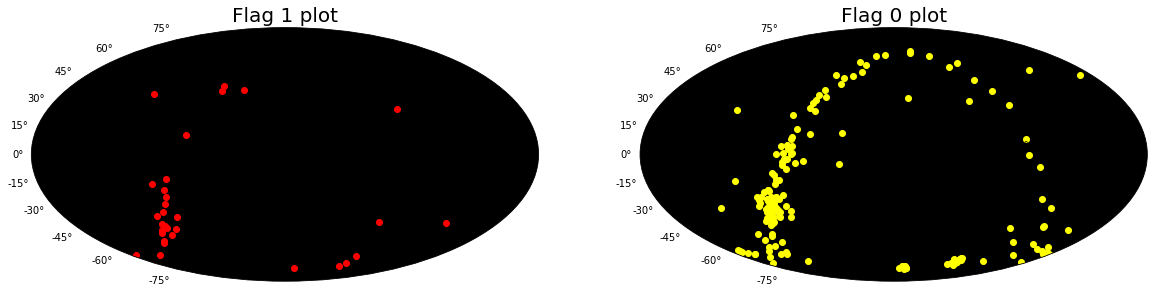

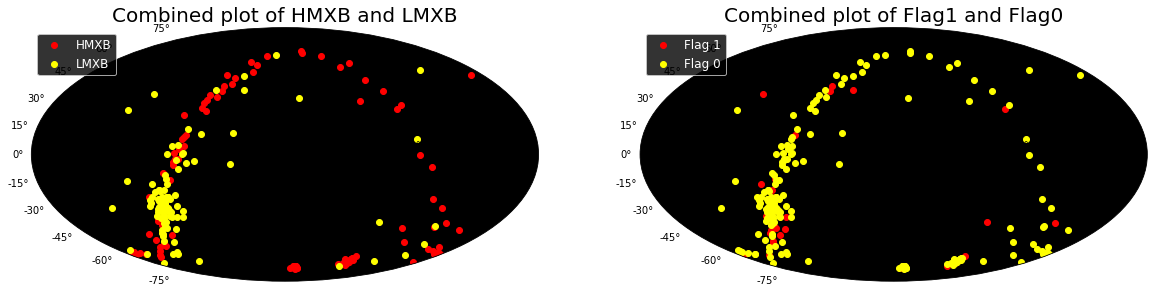

In [10]:
#QUESTION 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Astrosat_Catalog.csv')
df.loc[df['ra']>180,'ra1']=(df['ra']-360)*np.pi/180
df.loc[df['ra']<=180,'ra1']=df['ra']*np.pi/180
df.insert(7,'dec1',df['dec']*np.pi/180)
#hmxb and lmxb subplots
hmxb = df[df['Final_Type']=='HMXB']
lmxb = df[df['Final_Type']=='LMXB']
fig1 = plt.figure(figsize=(20,20))
hmxbplot = fig1.add_subplot(121, projection='mollweide',facecolor='black')
hmxbplot.scatter(hmxb['ra1'],hmxb['dec1'],color='red')
plt.title('HMXB Plot',fontsize=20)
lmxbplot = fig1.add_subplot(122, projection='mollweide',facecolor='black')
lmxbplot.scatter(lmxb['ra1'],lmxb['dec1'],color='yellow')
plt.title('LMXB Plot',fontsize=20)
#flag 1 and 0 subbplots
flag1 = df[df['Astrosat_Flag']==1]
flag0 = df[df['Astrosat_Flag']==0]
fig2 = plt.figure(figsize=(20,20))
flag1plot = fig2.add_subplot(121,projection='mollweide',facecolor='black')
flag1plot.scatter(flag1['ra1'],flag1['dec1'],color='red')
plt.title('Flag 1 plot',fontsize=20)
flag0plot = fig2.add_subplot(122,projection='mollweide',facecolor='black')
flag0plot.scatter(flag0['ra1'],flag0['dec1'],color='yellow')
plt.title('Flag 0 plot',fontsize=20)
#combined hmxb/lmxb plots
fig3 = plt.figure(figsize=(20,20))
com1 = fig3.add_subplot(121,projection='mollweide',facecolor='black')
com1.scatter(hmxb['ra1'],hmxb['dec1'],color='red',label='HMXB')
com1.scatter(lmxb['ra1'],lmxb['dec1'],color='yellow',label='LMXB')
plt.title('Combined plot of HMXB and LMXB',fontsize=20)
plt.legend(facecolor='black',labelcolor='white',fontsize='large')
com2 = fig3.add_subplot(122,projection='mollweide',facecolor='black')
com2.scatter(flag1['ra1'],flag1['dec1'],color='red',label='Flag 1')
com2.scatter(flag0['ra1'],flag0['dec1'],color='yellow',label='Flag 0')
plt.legend(facecolor='black',labelcolor='white',fontsize='large')
plt.title('Combined plot of Flag1 and Flag0',fontsize=20)

#No of LMXB and HXMB...
print('Number of HMXB is %d' %len(df[df['Final_Type']=='HMXB']))
print('Number of LMXB is %d' %len(df[df['Final_Type']=='LMXB']))
gra = df[df['SIMBAD_Name']=='Granat 1915+105'].reset_index(drop=True)
print("Coordinates of Granat 1915+105: %f RA, %f Dec " %(gra.iloc[0]['ra'],gra.iloc[0]['dec']))